In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [3]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
test.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,0,61
5,46232,Procurement,region_7,Bachelor's,m,sourcing,1,36,3.0,2,0,0,68
6,54542,Finance,region_2,Bachelor's,m,other,1,33,5.0,3,1,0,57
7,67269,Analytics,region_22,Bachelor's,m,sourcing,2,36,3.0,3,0,0,85
8,66174,Technology,region_7,Master's & above,m,other,1,51,4.0,11,0,0,75
9,76303,Technology,region_22,Bachelor's,m,sourcing,1,29,5.0,2,1,0,76


In [5]:
# Handling Train and test data

In [6]:
print((train.isnull().sum().sort_values(ascending=False)))

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64


In [7]:
train.shape

(54808, 14)

In [8]:
print(4124/54808)
print(2409/54808)

0.07524448985549555
0.04395343745438622


In [9]:
# test

In [10]:
test.isnull().sum().sort_values(ascending=False)

previous_year_rating    1812
education               1034
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [11]:
print(1812/54808)
print(1034/54808)

0.03306086702671143
0.018865858998686324


In [12]:
print(train.dtypes)
print(test.dtypes)


employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object
employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
dtype: object


In [13]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

### Exploratory Data analysis

In [14]:
# Count of deparartment

<AxesSubplot:xlabel='department', ylabel='count'>

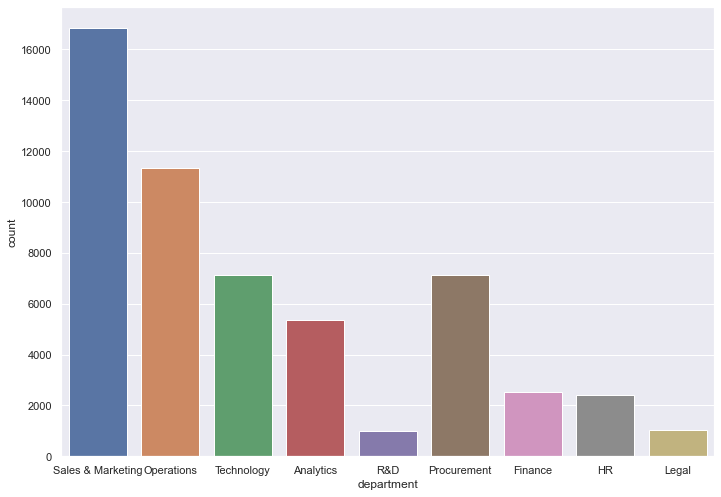

In [15]:
sns.set_style('whitegrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.countplot(x='department',data=train)

 It clearly shows that most of the people work on Sales & marketing

In [16]:
# We will check whether the departments are based on particular region

Text(0.5, 1.0, 'Diffrent region in company')

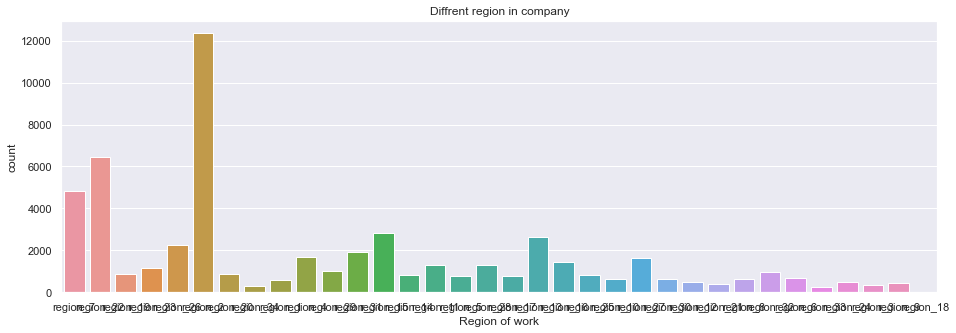

In [17]:
sns.set(rc={'figure.figsize':(15.7,5)})
sns.countplot(x="region",data=train)
plt.xlabel('Region of work')
plt.title('Diffrent region in company')

 It is clearly seen that the region 2 is the high region employment

In [18]:
# Lets check wheather the degree of education plays an vital role

C:\Users\Gokul\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

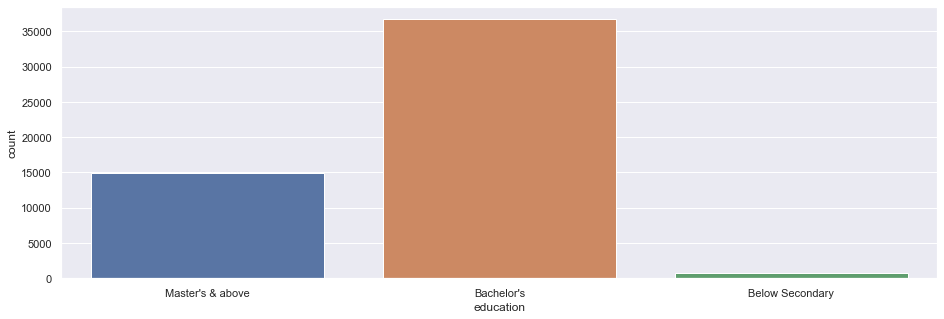

In [19]:
sns.countplot('education',data=train)

Most of the employed people have jumped into employed from Bachelors education

In [20]:
# Lets chek wheaters the training depends on the age

<AxesSubplot:xlabel='gender', ylabel='age'>

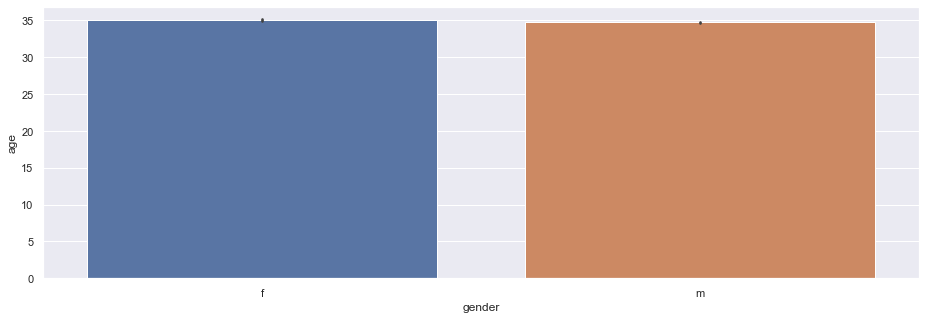

In [21]:
sns.barplot(x="gender",y="age",data=train)

Both the Male and female are equal

In [22]:
# We see wheather the previous year rating is based on their promotion

<AxesSubplot:xlabel='is_promoted', ylabel='previous_year_rating'>

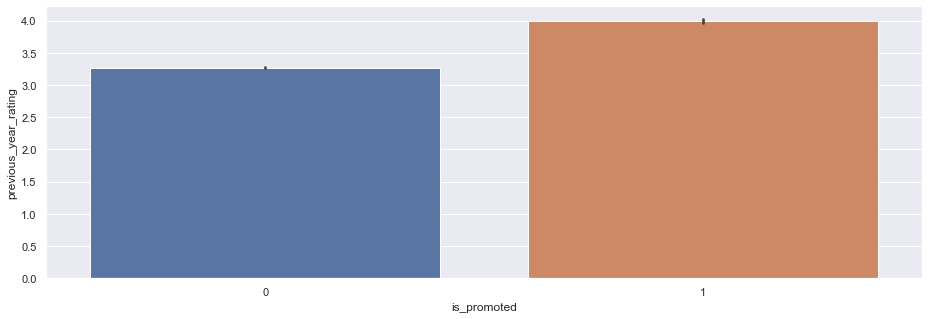

In [23]:
sns.barplot(x="is_promoted",y="previous_year_rating",data=train)

We can see that the promotion doesnt play an vital role in previous_year_rating

In [24]:
# Lets see wheater the length of service depends on the promotion rate

<AxesSubplot:xlabel='is_promoted', ylabel='length_of_service'>

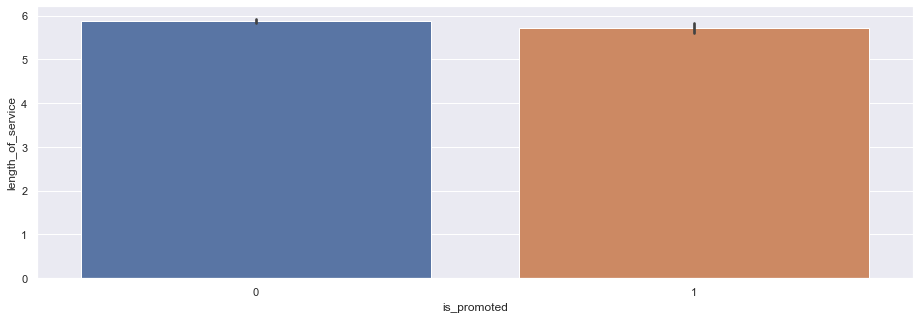

In [25]:
sns.barplot(y=train.length_of_service,x=train.is_promoted)

### Feature Engineering 

In [26]:
# Imputing Missing values in train values

In [27]:
train.isnull().sum().sort_values(ascending=False)

previous_year_rating    4124
education               2409
is_promoted                0
avg_training_score         0
awards_won?                0
KPIs_met >80%              0
length_of_service          0
age                        0
no_of_trainings            0
recruitment_channel        0
gender                     0
region                     0
department                 0
employee_id                0
dtype: int64

In [28]:
# Previous_year_rating

In [29]:
train.previous_year_rating.value_counts()

3.0    18618
5.0    11741
4.0     9877
1.0     6223
2.0     4225
Name: previous_year_rating, dtype: int64

In [30]:
from sklearn.impute import SimpleImputer

In [31]:
Simple_imputer=SimpleImputer(missing_values=np.nan,strategy="most_frequent")

In [32]:
imputerdf=Simple_imputer.fit_transform(train)

In [33]:
train_labels=train.columns

In [34]:
train=pd.DataFrame(imputerdf,columns=train_labels)

In [35]:
# Imputing missing values in test data

In [36]:
imputer_test=Simple_imputer.fit_transform(test)

In [37]:
test_labels=test.columns

In [38]:
test=pd.DataFrame(imputer_test,columns=test_labels)

In [39]:
test.isnull().sum().sort_values(ascending=False)

avg_training_score      0
awards_won?             0
KPIs_met >80%           0
length_of_service       0
previous_year_rating    0
age                     0
no_of_trainings         0
recruitment_channel     0
gender                  0
education               0
region                  0
department              0
employee_id             0
dtype: int64

In [40]:
# Gender

In [41]:
train.gender.value_counts()

m    38496
f    16312
Name: gender, dtype: int64

In [44]:
train['gender']=train.gender.replace("m",1)
train['gender']=train.gender.replace("f",0)


In [45]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,0,sourcing,1,35,5,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,1,other,1,30,5,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,1,sourcing,1,34,3,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,1,other,2,39,1,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,1,other,1,45,3,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,1,sourcing,2,31,3,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,0,other,1,31,3,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,1,sourcing,1,33,3,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,1,other,1,28,4,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,1,sourcing,1,32,5,5,1,0,54,0


In [46]:
#Label Encoding

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label=LabelEncoder()

In [53]:
train=train.apply(label.fit_transform)

In [54]:
train.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,45805,7,31,2,0,2,0,15,4,7,1,0,10,0
1,45593,4,14,0,1,0,0,10,4,3,0,0,21,0
2,5247,7,10,0,1,2,0,14,2,6,0,0,11,0
3,1772,7,15,0,1,0,1,19,0,9,0,0,11,0
4,34270,8,18,0,1,0,0,25,2,1,0,0,34,0
5,41226,0,11,0,1,2,1,11,2,6,0,0,46,0
6,14219,4,12,0,0,0,0,11,2,4,0,0,20,0
7,11402,4,27,2,1,2,0,13,2,5,0,0,24,0
8,51234,0,12,0,1,0,0,8,3,4,0,0,44,0
9,20134,7,0,2,1,2,0,12,4,4,1,0,15,0


In [55]:
# Labe Encoding in test data

In [56]:
test=test.apply(label.fit_transform)

In [74]:
test1.head(10)

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8,18,0,1,2,0,4,2,0,1,0,38
1,2,28,0,0,0,0,11,2,4,0,0,12
2,7,4,0,1,0,0,11,0,3,0,0,8
3,5,11,0,0,0,2,11,1,8,0,0,26
4,1,21,0,1,2,0,10,3,6,0,0,22
5,5,31,0,1,2,0,16,2,1,0,0,29
6,1,11,0,1,0,0,13,4,2,1,0,18
7,0,14,0,1,2,1,16,2,2,0,0,46
8,8,31,2,1,0,0,31,3,10,0,0,36
9,8,14,0,1,2,0,9,4,1,1,0,37


In [63]:
train1=train.copy()
test1=test.copy()

In [70]:
#train1=train.drop('employee_id',"is_promoted",axis=1)

In [71]:
test1=test.drop('employee_id',axis=1)

In [78]:
# Data spliting

In [81]:
X=train1
y=train["is_promoted"]

In [83]:
print(X.shape)
print(y.shape)

(54808, 12)
(54808,)


In [84]:
from sklearn.model_selection import train_test_split


In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [90]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(41106, 12)
(13702, 12)
(41106,)
(13702,)


In [75]:
# Data Modelling

In [91]:
from sklearn.linear_model import LogisticRegression

In [94]:
log_reg=LogisticRegression(max_iter=500)

In [95]:
model=log_reg.fit(X_train,y_train)

In [96]:
model.score(X_train,y_train)

0.9165328662482363

In [102]:
train_predict=model.predict(X_test)

In [113]:
test_predict=model.predict(X_test)

In [114]:
test_predict

array([0, 0, 0, ..., 0, 0, 0])

In [115]:
pd.DataFrame(test_predict).to_csv('Test_pred.csv')